In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('darkgrid')

In [3]:
## load the data
df_cases = pd.read_pickle('./corona_scotland_regions_ts.pk')
df_total = pd.read_pickle('./corona_scotland_total_stats.pk')
df_pop = pd.read_pickle('./scotland_population.pk')

In [4]:
# reset indices
df_cases = df_cases.reset_index(drop=True)
df_total = df_total.reset_index(drop=True)

In [5]:
df_cases.tail(15)

Health Board,Ayrshire and Arran,Borders,Dumfries and Galloway,Eileanan Siar (Western Isles),Fife,Forth Valley,Grampian,Greater Glasgow and Clyde,Highland,Lanarkshire,Lothian,Orkney,Shetland,Tayside,Scotland (Total)
29,254,110,127,3,173,208,177,851,85,427,476,4,40,410,3345
30,267,130,141,4,200,226,194,931,99,478,534,4,41,457,3706
31,288,139,144,4,227,231,209,984,102,512,577,4,41,499,3961
32,296,149,152,4,239,243,210,1094,112,547,621,4,42,516,4229
33,312,160,155,4,255,259,223,1166,122,575,700,4,43,586,4564
34,362,167,163,5,288,280,236,1251,137,607,747,4,43,667,4957
35,364,177,164,6,333,302,251,1314,144,662,799,4,43,712,5275
36,376,189,179,6,356,324,261,1387,148,707,856,5,43,753,5590
37,390,199,186,6,379,337,291,1449,151,758,915,5,43,803,5912
38,390,204,192,6,383,352,313,1486,163,784,932,5,45,812,6067


In [6]:
df_total.tail(10)

,Total Tests,Total Positive Cases,Total Deaths
34,27518,4957,447
35,28652,5275,495
36,29903,5590,542
37,31114,5912,566
38,31813,6067,575
39,32855,6358,615
40,34064,6748,699
41,35392,7102,779
42,36637,7409,837
43,38233,7820,893


## National Statistics

### total number of cases over time

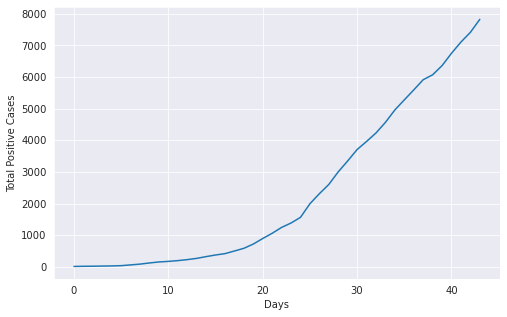

In [7]:
df_total['Total Positive Cases'].plot(figsize=(8, 5))
plt.ylabel('Total Positive Cases')
plt.xlabel('Days')
plt.show()

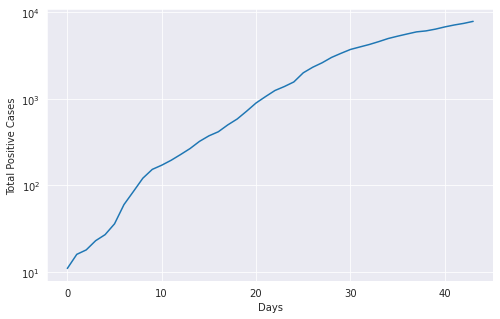

In [8]:
## same but with log y axis
df_total['Total Positive Cases'].plot(logy=True, figsize=(8, 5))
plt.ylabel('Total Positive Cases')
plt.xlabel('Days')
plt.show()

### Total Number of Tests Over Time

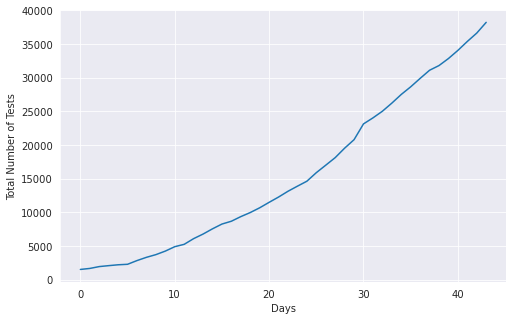

In [9]:
df_total['Total Tests'].plot(figsize=(8, 5))
plt.ylabel('Total Number of Tests')
plt.xlabel('Days')
plt.show()

In [10]:
num_test_per_day = df_total['Total Tests'].diff()
num_test_per_day.loc[0] = df_total['Total Tests'].loc[0]

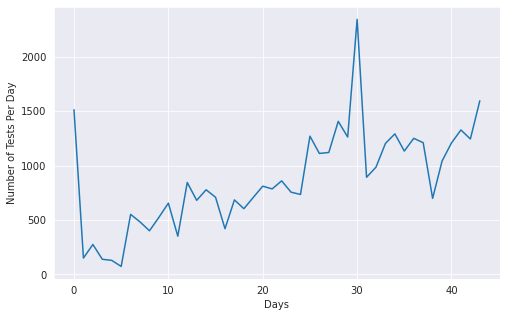

In [11]:
num_test_per_day.plot(figsize=(8, 5))
plt.ylabel('Number of Tests Per Day')
plt.xlabel('Days')
plt.show()

### Total number of deaths over time

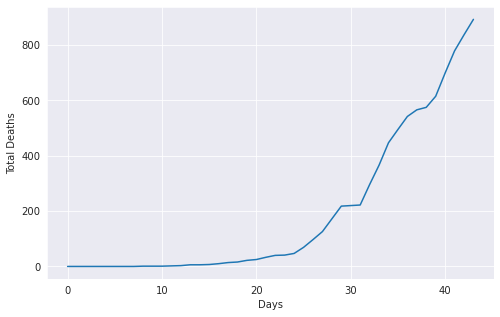

In [12]:
df_total['Total Deaths'].plot(figsize=(8, 5))
plt.ylabel('Total Deaths')
plt.xlabel('Days')
plt.show()

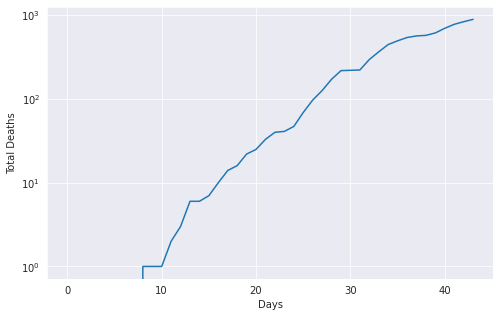

In [13]:
df_total['Total Deaths'].plot(logy=True, figsize=(8, 5))
plt.ylabel('Total Deaths')
plt.xlabel('Days')
plt.show()

### What is the Delay Between Recorded Cases and Deaths?

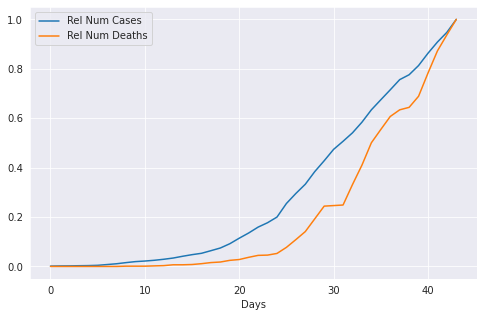

In [14]:
rel_cases = (df_total['Total Positive Cases'] / df_total['Total Positive Cases'].max())
rel_deaths = (df_total['Total Deaths'] / df_total['Total Deaths'].max())

rel_cases.plot(label='Rel Num Cases', figsize=(8, 5))
rel_deaths.plot(label='Rel Num Deaths')

plt.xlabel('Days')
plt.legend()
plt.show()

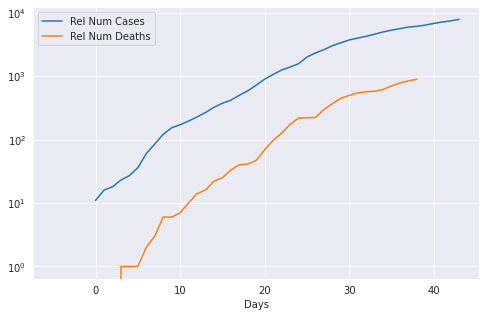

In [15]:
rel_cases = df_total['Total Positive Cases'].copy()
rel_deaths = df_total['Total Deaths'].copy()

# subtract some time off of deaths
rel_deaths.index = rel_deaths.index - 5

rel_cases.plot(logy=True, label='Rel Num Cases', figsize=(8, 5))
rel_deaths.plot(logy=True, label='Rel Num Deaths')

plt.xlabel('Days')
plt.legend()
plt.show()

- Deaths are perhaps roughly 5-10 days behind cases using this hand-wavy plot argument.

### What is the day-on-day percentage rise in cases?

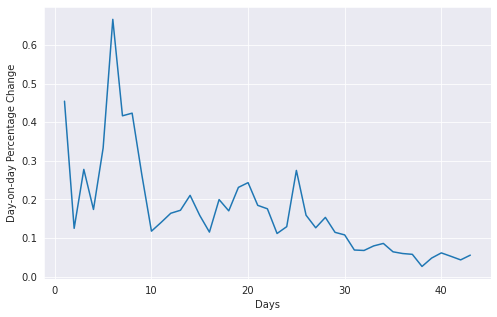

In [16]:
df_total['Total Positive Cases'].pct_change().plot(figsize=(8, 5))
plt.ylabel('Day-on-day Percentage Change')
plt.xlabel('Days')
plt.show()

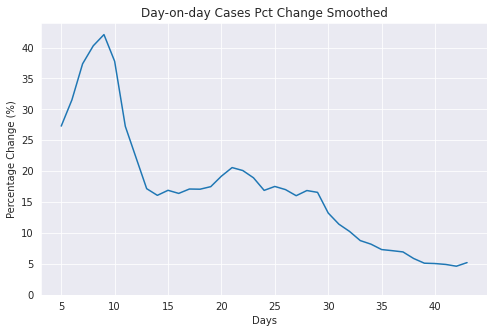

In [17]:
df_total['Total Positive Cases'].pct_change().rolling(5).mean().mul(100).plot(figsize=(8, 5))
plt.ylabel('Percentage Change (%)')
plt.xlabel('Days')
plt.yticks(np.arange(0, 45, 5))
plt.title('Day-on-day Cases Pct Change Smoothed')
plt.show()

In [18]:
df_total['Total Positive Cases'].pct_change()[-7:]

37    0.057603
38    0.026218
39    0.047964
40    0.061340
41    0.052460
42    0.043227
43    0.055473
Name: Total Positive Cases, dtype: float64

In [19]:
df_total['Total Positive Cases'].pct_change().describe()

count    43.000000
mean      0.171303
std       0.129864
min       0.026218
25%       0.074129
50%       0.140351
75%       0.205023
max       0.666667
Name: Total Positive Cases, dtype: float64

In [20]:
df_cases.pct_change()[-10:]

Health Board,Ayrshire and Arran,Borders,Dumfries and Galloway,Eileanan Siar (Western Isles),Fife,Forth Valley,Grampian,Greater Glasgow and Clyde,Highland,Lanarkshire,Lothian,Orkney,Shetland,Tayside,Scotland (Total)
34,0.160256,0.043750,0.051613,0.25,0.129412,0.081081,0.058296,0.072899,0.122951,0.055652,0.067143,0.00,0.000000,0.138225,0.086109
35,0.005525,0.059880,0.006135,0.20,0.156250,0.078571,0.063559,0.050360,0.051095,0.090610,0.069612,0.00,0.000000,0.067466,0.064152
36,0.032967,0.067797,0.091463,0.00,0.069069,0.072848,0.039841,0.055556,0.027778,0.067976,0.071339,0.25,0.000000,0.057584,0.059716
37,0.037234,0.052910,0.039106,0.00,0.064607,0.040123,0.114943,0.044701,0.020270,0.072136,0.068925,0.00,0.000000,0.066401,0.057603
38,0.000000,0.025126,0.032258,0.00,0.010554,0.044510,0.075601,0.025535,0.079470,0.034301,0.018579,0.00,0.046512,0.011208,0.026218
39,0.066667,0.019608,0.036458,0.00,0.036554,0.042614,0.070288,0.059892,0.030675,0.048469,0.061159,0.00,0.000000,0.017241,0.047964
40,0.098558,0.033654,0.040201,0.00,0.068010,0.035422,0.065672,0.054603,0.071429,0.062044,0.051567,0.00,0.000000,0.087167,0.061340
41,0.100656,0.023256,0.000000,0.00,0.051887,0.052632,0.089636,0.048766,0.022222,0.043528,0.064423,0.00,0.000000,0.043430,0.052460
42,0.065606,0.040909,0.009662,0.00,0.094170,0.077500,0.012853,0.029851,0.016304,0.025247,0.058717,0.00,0.000000,0.044824,0.043227
43,0.044776,0.008734,0.062201,0.00,0.053279,0.046404,0.096447,0.061873,0.032086,0.065310,0.057167,0.00,0.000000,0.043922,0.055473


In [21]:
df_cases.pct_change().rolling(5).mean()[-10:]

Health Board,Ayrshire and Arran,Borders,Dumfries and Galloway,Eileanan Siar (Western Isles),Fife,Forth Valley,Grampian,Greater Glasgow and Clyde,Highland,Lanarkshire,Lothian,Orkney,Shetland,Tayside,Scotland (Total)
34,0.074384,0.088113,0.051684,0.116667,0.108058,0.061507,0.059670,0.080287,0.101057,0.073153,0.094597,0.00,0.014640,0.102898,0.081943
35,0.065253,0.063726,0.030863,0.090000,0.108094,0.059914,0.053173,0.071558,0.078335,0.067388,0.084150,0.00,0.009640,0.093464,0.073188
36,0.056116,0.063439,0.044901,0.090000,0.094908,0.070058,0.045677,0.071283,0.077830,0.066757,0.082313,0.05,0.009640,0.086601,0.071370
37,0.058007,0.059632,0.041611,0.090000,0.097257,0.067693,0.067709,0.057866,0.062276,0.067512,0.080847,0.05,0.004762,0.093067,0.069359
38,0.047196,0.049893,0.044115,0.090000,0.085978,0.063427,0.070448,0.049810,0.060313,0.064135,0.059120,0.05,0.009302,0.068177,0.058759
39,0.028479,0.045064,0.041084,0.040000,0.067407,0.055733,0.072846,0.047209,0.041858,0.062698,0.057923,0.05,0.009302,0.043980,0.051130
40,0.047085,0.039819,0.047897,0.000000,0.049759,0.047104,0.073269,0.048057,0.045924,0.056985,0.054314,0.05,0.009302,0.047920,0.050568
41,0.060623,0.030911,0.029605,0.000000,0.046322,0.043060,0.083228,0.046699,0.044813,0.052096,0.052931,0.00,0.009302,0.045089,0.049117
42,0.066297,0.028510,0.023716,0.000000,0.052235,0.050536,0.062810,0.043729,0.044020,0.042718,0.050889,0.00,0.009302,0.040774,0.046242
43,0.075253,0.025232,0.029704,0.000000,0.060780,0.050914,0.066979,0.050997,0.034543,0.048920,0.058607,0.00,0.000000,0.047317,0.052093


### What is the day-on-day percentage rise in deaths?

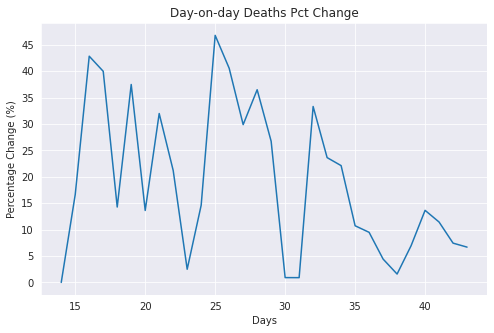

In [22]:
# remove first 13 points because they have nothing
death_pct_change = df_total['Total Deaths'].iloc[13:].pct_change()
death_pct_change.mul(100).plot(figsize=(8, 5))
plt.yticks(np.arange(0, 50, 5))
plt.title('Day-on-day Deaths Pct Change')
plt.ylabel('Percentage Change (%)')
plt.xlabel('Days')
plt.show()

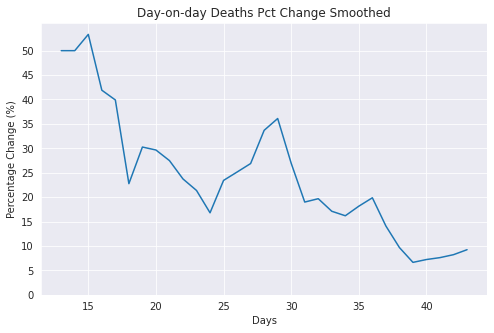

In [23]:
# remove first 13 points because they have nothing
death_pct_change = df_total['Total Deaths'].pct_change()
death_pct_change.rolling(5).mean().mul(100).plot(figsize=(8, 5))
plt.yticks(np.arange(0, 55, 5))
plt.title('Day-on-day Deaths Pct Change Smoothed')
plt.ylabel('Percentage Change (%)')
plt.xlabel('Days')
plt.show()

In [24]:
death_pct_change[-10:]

34    0.221311
35    0.107383
36    0.094949
37    0.044280
38    0.015901
39    0.069565
40    0.136585
41    0.114449
42    0.074454
43    0.066906
Name: Total Deaths, dtype: float64

In [25]:
death_pct_change.describe()

count    36.000000
mean           inf
std            NaN
min       0.000000
25%       0.068900
50%       0.156504
75%       0.367560
max            inf
Name: Total Deaths, dtype: float64

### What is the Proportion of Positive Tests?

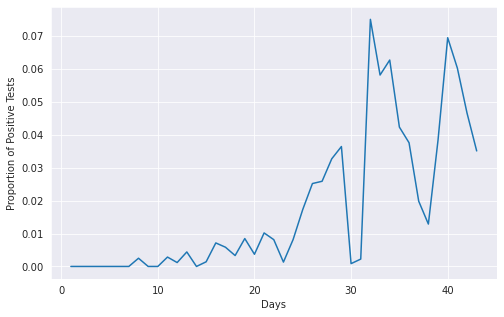

In [26]:
prop_pos = (df_total['Total Deaths'].diff() / df_total['Total Tests'].diff()).dropna()

prop_pos.plot(figsize=(8, 5))
plt.ylabel('Proportion of Positive Tests')
plt.xlabel('Days')
plt.show()

## Regional Statistics

### Num Cases Per Region

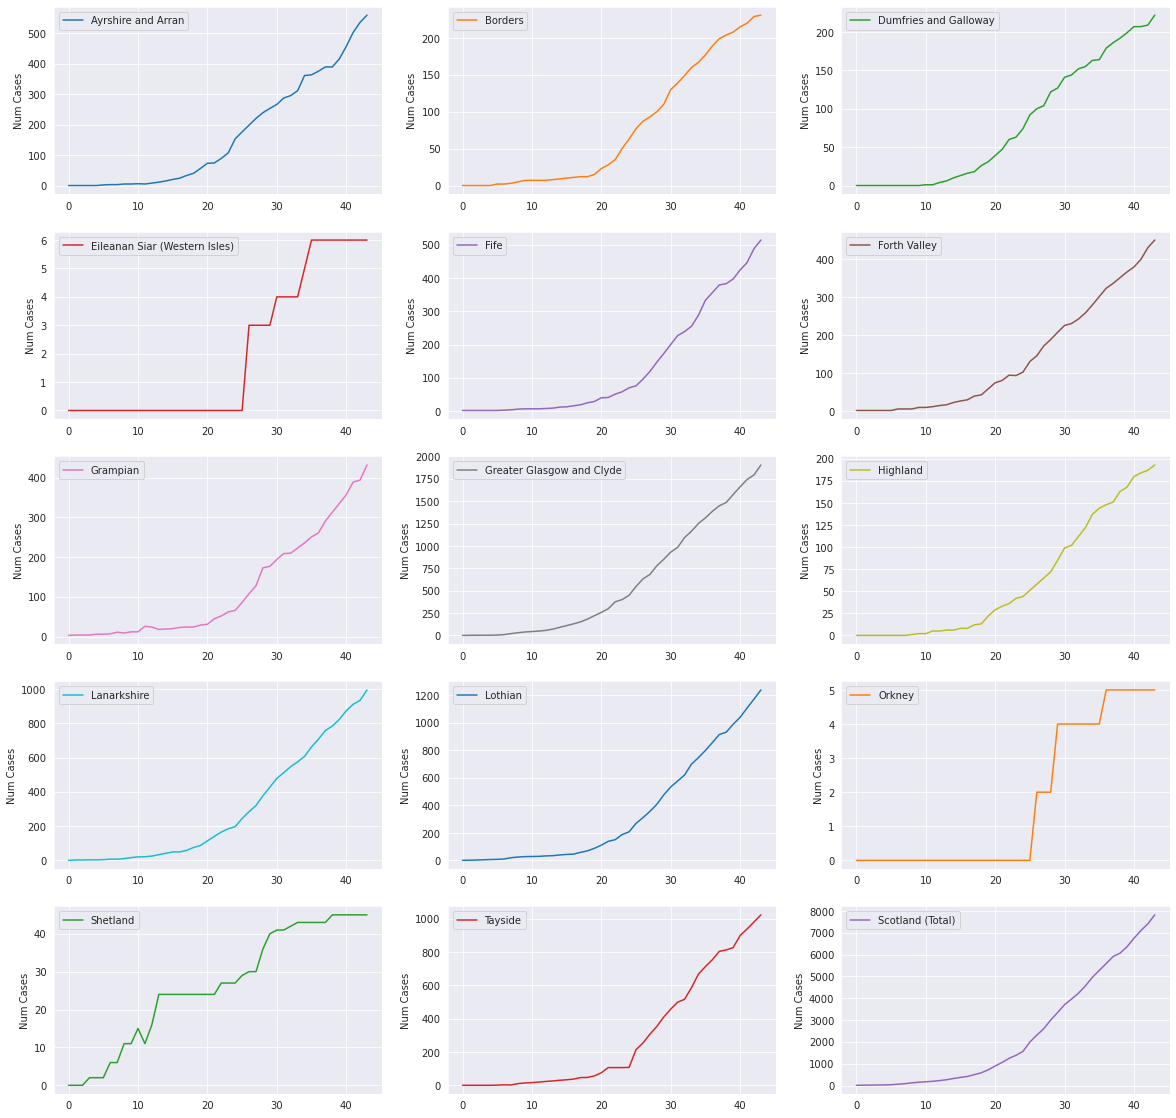

In [27]:
axes = df_cases.plot(subplots=True, layout=(5, 3), figsize=(20, 20), sharex=False)
for ax in axes.flatten():
    ax.set_ylabel('Num Cases')
plt.show()

- Same again, but sharing the y axis for comparison, omitting the total so we can compare regions

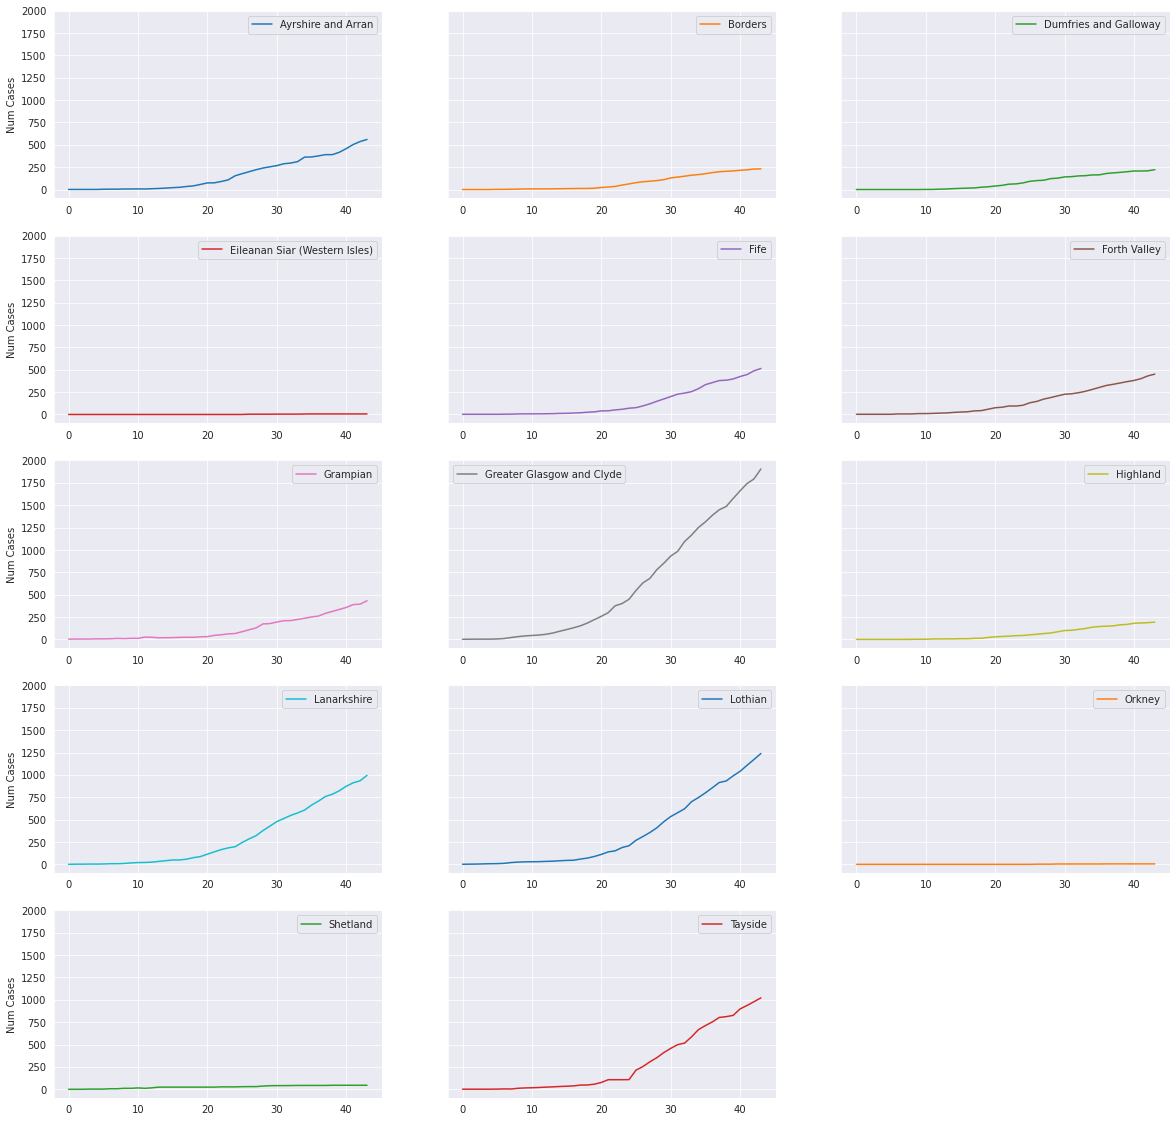

In [28]:
axes = df_cases.drop(columns='Scotland (Total)').plot(subplots=True, layout=(5, 3), figsize=(20, 20), sharey=True, sharex=False)
for ax in axes.flatten():
    ax.set_ylabel('Num Cases')
plt.show()

### Num Cases Per Capita Per Region

In [29]:
194 / 178

1.0898876404494382

In [30]:
## make sure columns are in the right order
assert all(df_cases.columns == df_pop.index)

In [31]:
df_cases_rel = df_cases / df_pop.values.T * 100000

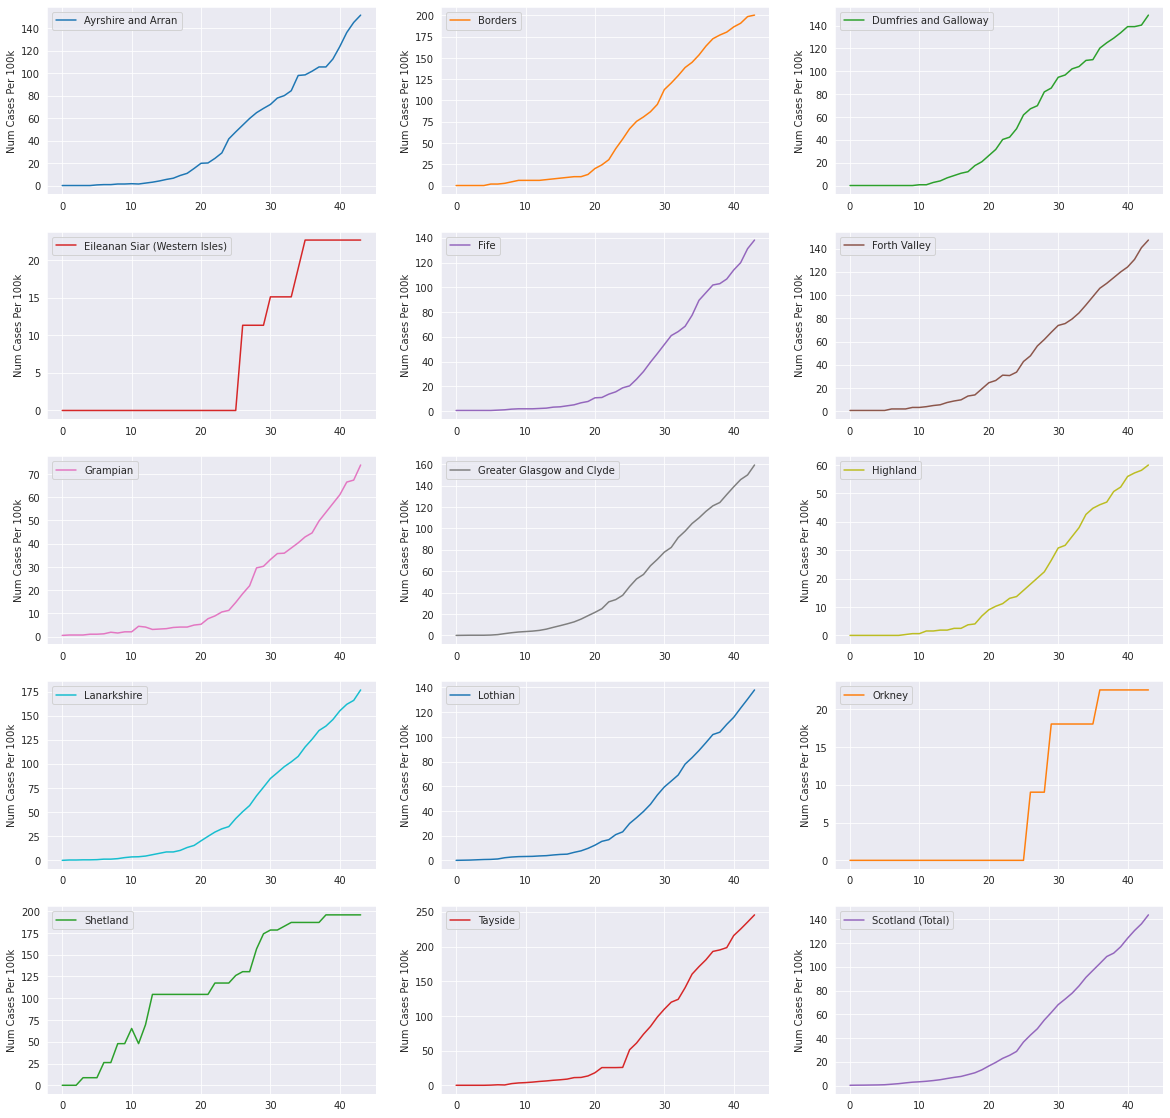

In [32]:
axes = df_cases_rel.plot(subplots=True, layout=(5, 3), figsize=(20, 20), sharex=False)
for ax in axes.flatten():
    ax.set_ylabel('Num Cases Per 100k')
plt.show()

- Same again but sharing the y axis for comparison

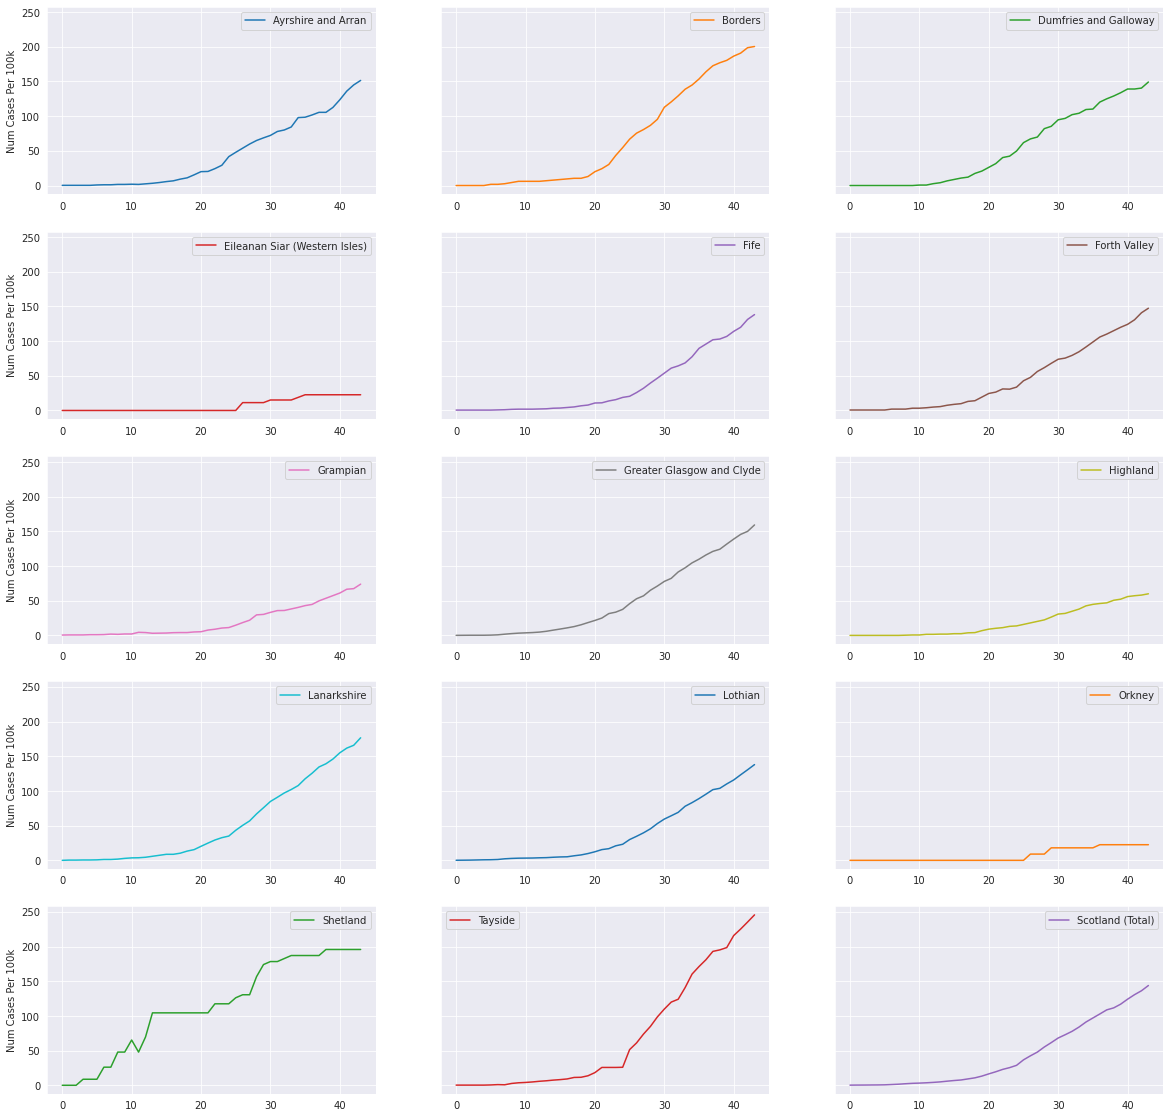

In [33]:
axes = df_cases_rel.plot(subplots=True, layout=(5, 3), figsize=(20, 20), sharey=True, sharex=False)
for ax in axes.flatten():
    ax.set_ylabel('Num Cases Per 100k')
plt.show()

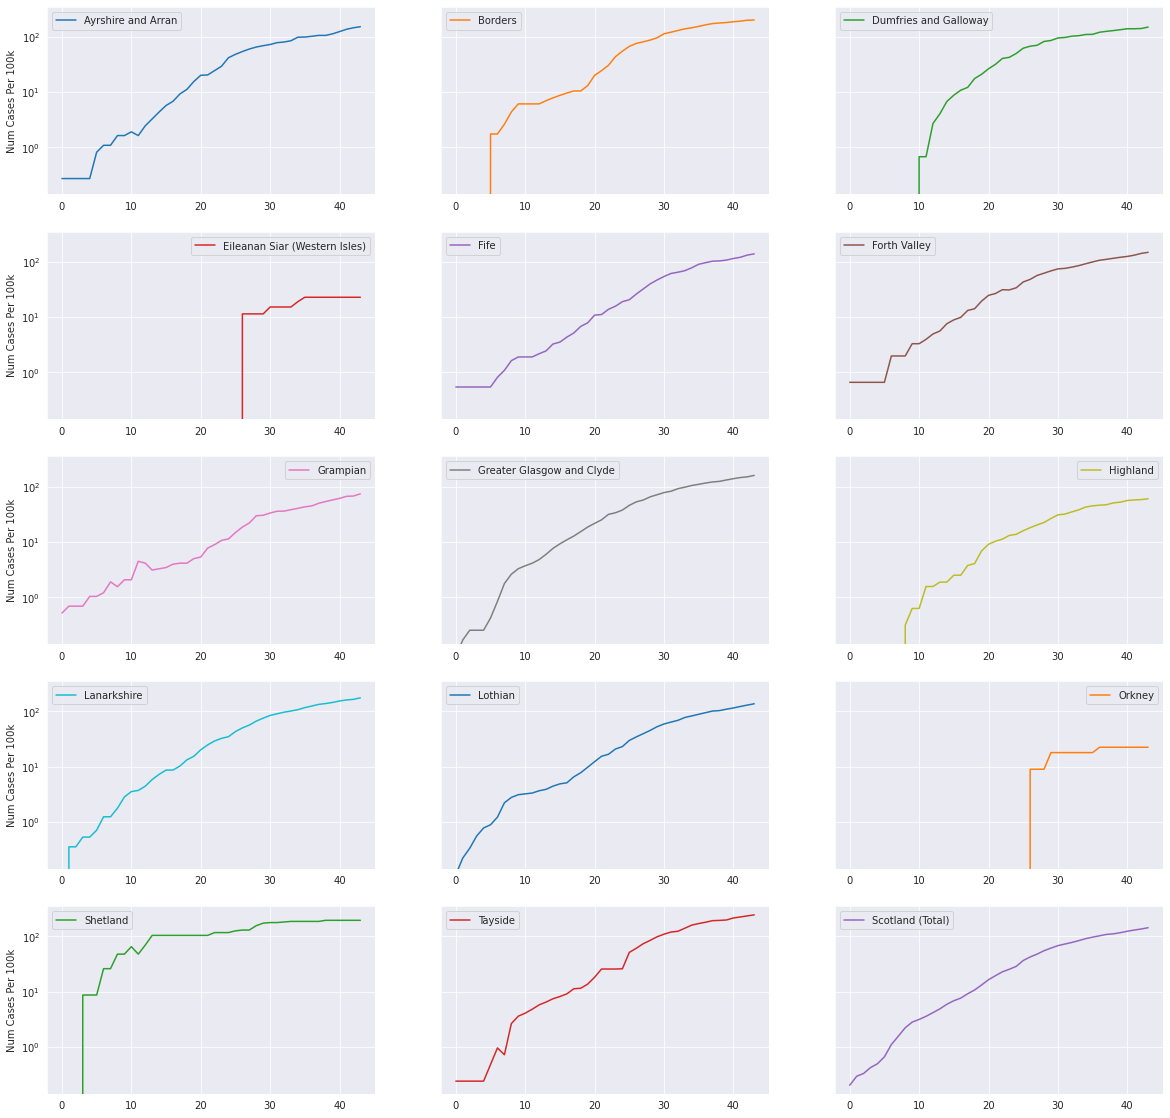

In [34]:
axes = df_cases_rel.plot(subplots=True, layout=(5, 3), figsize=(20, 20), sharey=True, sharex=False, logy=True)
for ax in axes.flatten():
    ax.set_ylabel('Num Cases Per 100k')
plt.show()

### Day-on-day Num Cases

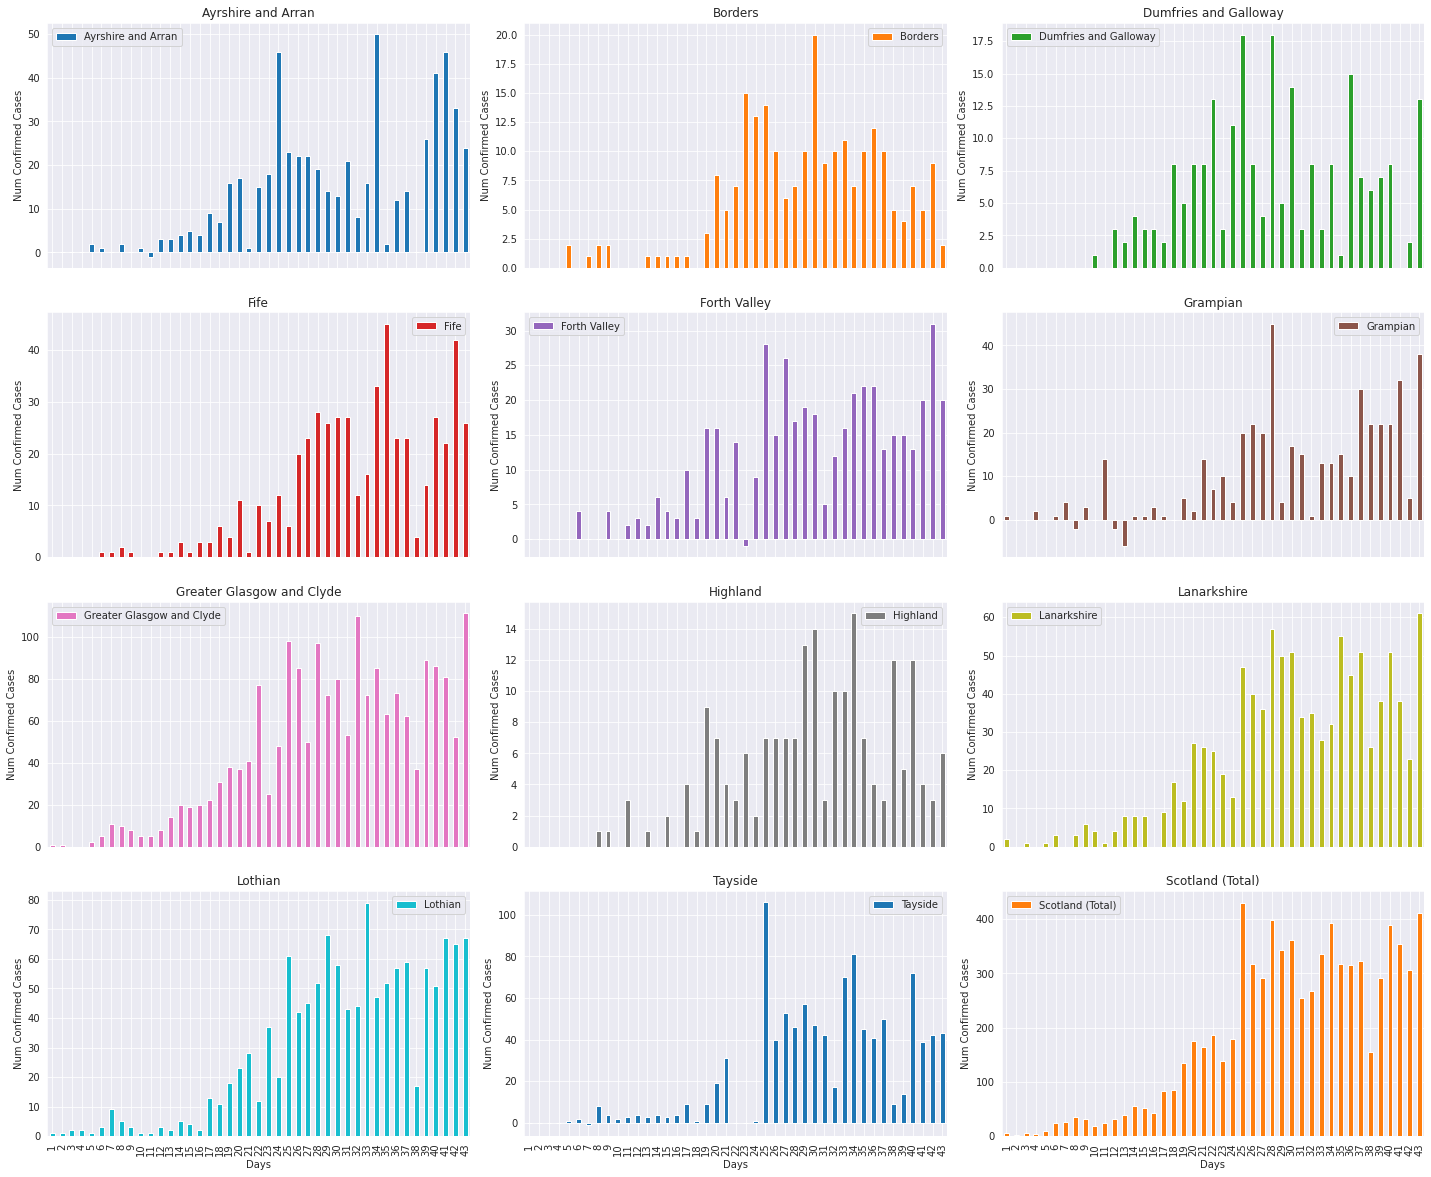

In [35]:
diff_cases = df_cases.drop(columns=['Orkney', 'Eileanan Siar (Western Isles)', 'Shetland']).diff().dropna()#.rolling(3).mean()
axes = diff_cases.plot.bar(subplots=True, figsize=(20,20), layout=(5, 3))
for ax in axes.flatten(): 
    ax.set_ylabel('Num Confirmed Cases')
    ax.set_xlabel('Days')
plt.tight_layout()
plt.show()

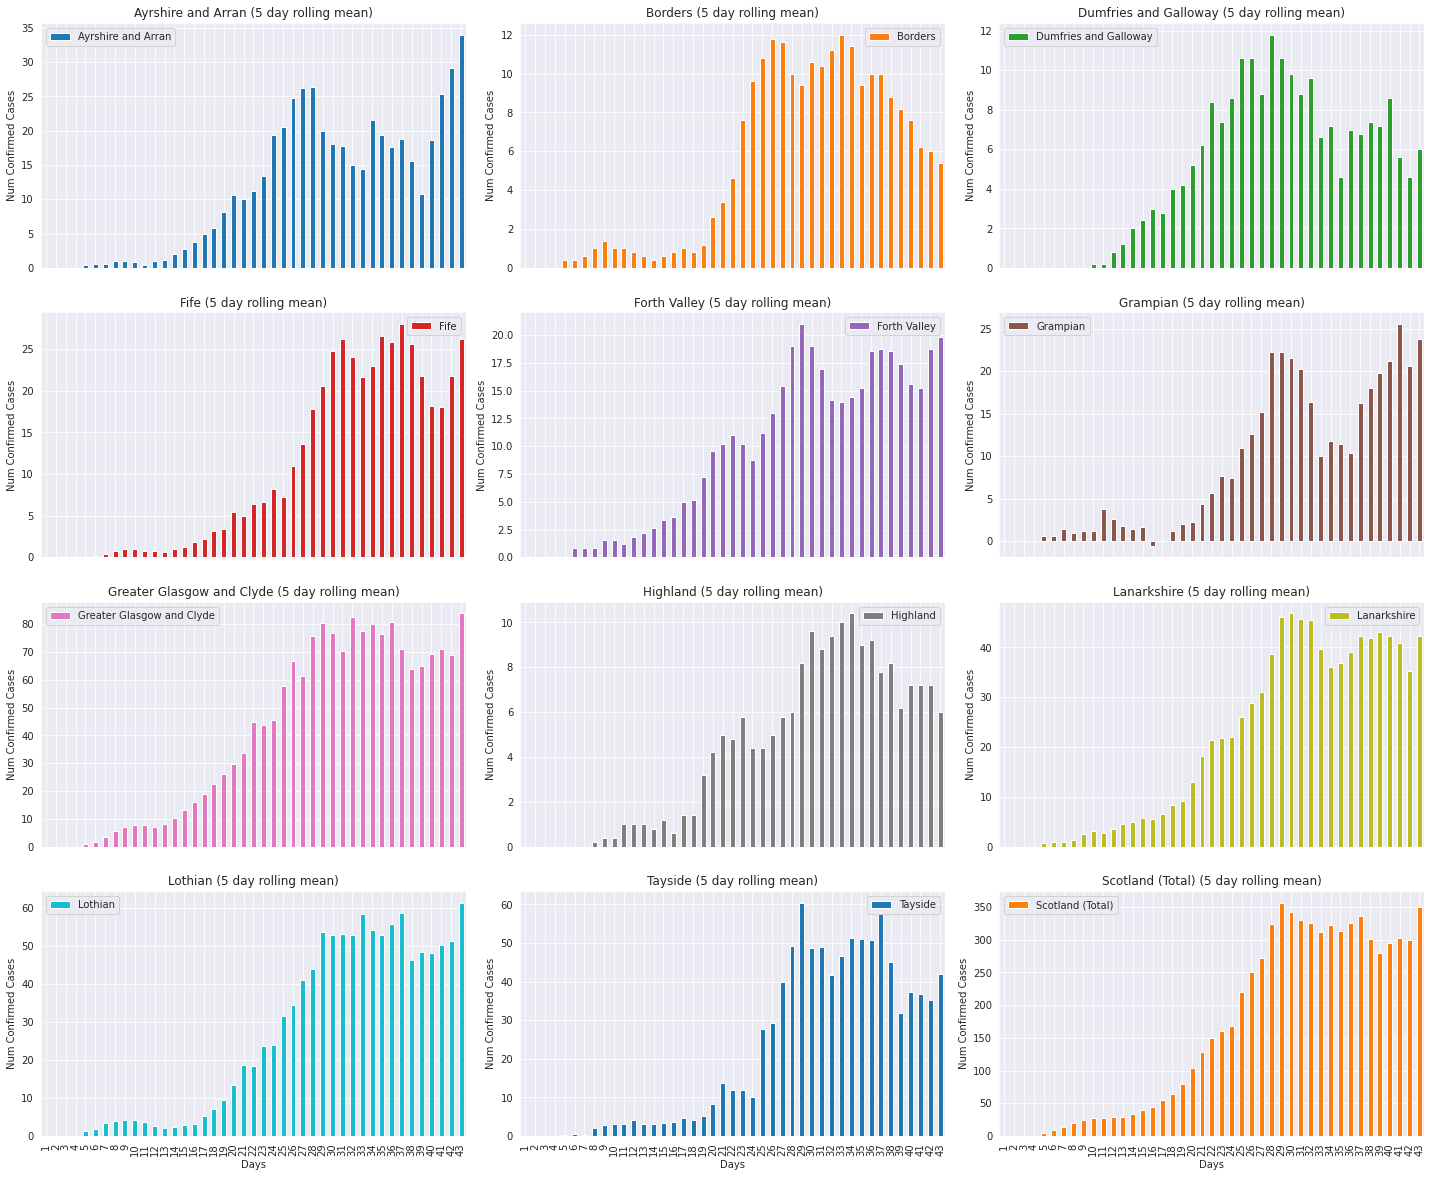

In [36]:
diff_cases = df_cases.drop(columns=['Orkney', 'Eileanan Siar (Western Isles)', 'Shetland']).diff().dropna().rolling(5).mean()
axes = diff_cases.plot.bar(subplots=True, figsize=(20,20), layout=(5, 3))
for ax in axes.flatten(): 
    ax.set_ylabel('Num Confirmed Cases')
    ax.set_xlabel('Days')
    ax.set_title(ax.get_title() + ' (5 day rolling mean)')
plt.tight_layout()
plt.show()

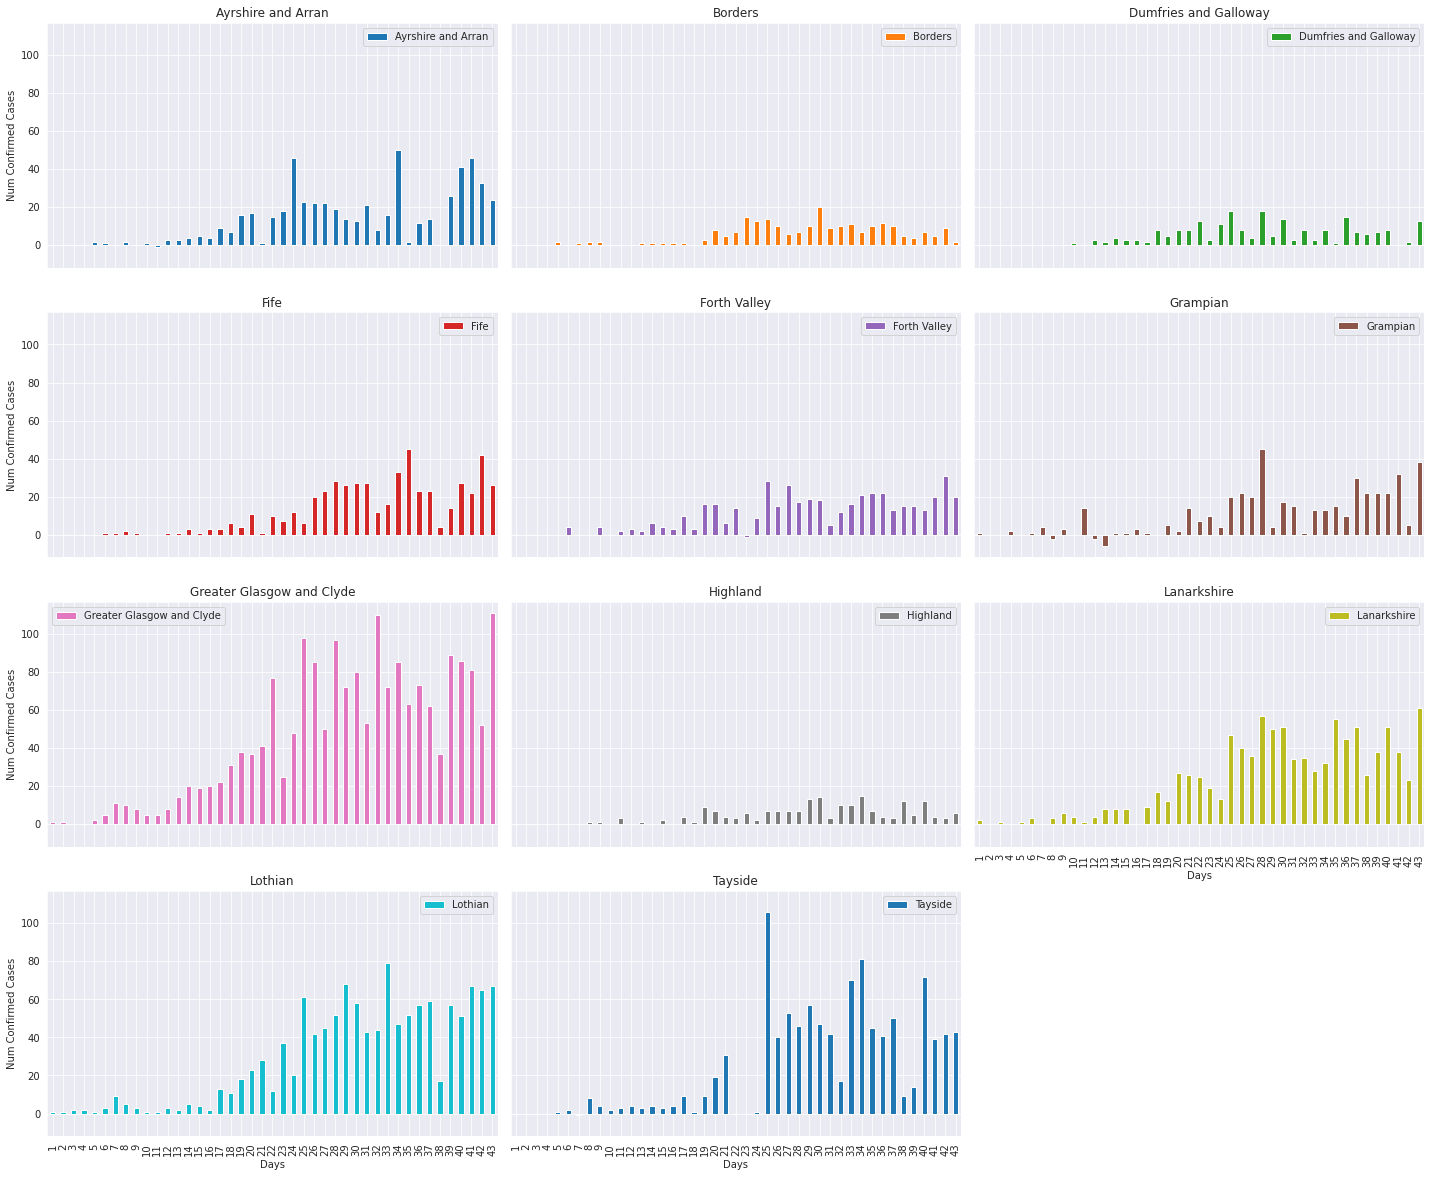

In [37]:
diff_cases = df_cases.drop(columns=['Scotland (Total)', 'Orkney', 'Eileanan Siar (Western Isles)', 'Shetland']).diff().dropna()#.rolling(3).mean()
axes = diff_cases.plot.bar(subplots=True, figsize=(20,20), sharey=True, layout=(5, 3))
for ax in axes.flatten(): 
    ax.set_ylabel('Num Confirmed Cases')
    ax.set_xlabel('Days')
plt.tight_layout()
plt.show()

In [38]:
df_cases.columns

Index(['Ayrshire and Arran', 'Borders', 'Dumfries and Galloway',
       'Eileanan Siar (Western Isles)', 'Fife', 'Forth Valley', 'Grampian',
       'Greater Glasgow and Clyde', 'Highland', 'Lanarkshire', 'Lothian',
       'Orkney', 'Shetland', 'Tayside', 'Scotland (Total)'],
      dtype='object', name='Health Board')

In [39]:
df_cases_rel.idxmax(1)

0     Forth Valley
1         Grampian
2         Grampian
3         Shetland
4         Shetland
5         Shetland
6         Shetland
7         Shetland
8         Shetland
9         Shetland
10        Shetland
11        Shetland
12        Shetland
13        Shetland
14        Shetland
15        Shetland
16        Shetland
17        Shetland
18        Shetland
19        Shetland
20        Shetland
21        Shetland
22        Shetland
23        Shetland
24        Shetland
25        Shetland
26        Shetland
27        Shetland
28        Shetland
29        Shetland
30        Shetland
31        Shetland
32        Shetland
33        Shetland
34        Shetland
35        Shetland
36        Shetland
37         Tayside
38        Shetland
39         Tayside
40         Tayside
41         Tayside
42         Tayside
43         Tayside
dtype: object

In [40]:
df_cases.drop(columns='Scotland (Total)').idxmax(1)

0                      Grampian
1                      Grampian
2                      Grampian
3                       Lothian
4                       Lothian
5                       Lothian
6                       Lothian
7     Greater Glasgow and Clyde
8     Greater Glasgow and Clyde
9     Greater Glasgow and Clyde
10    Greater Glasgow and Clyde
11    Greater Glasgow and Clyde
12    Greater Glasgow and Clyde
13    Greater Glasgow and Clyde
14    Greater Glasgow and Clyde
15    Greater Glasgow and Clyde
16    Greater Glasgow and Clyde
17    Greater Glasgow and Clyde
18    Greater Glasgow and Clyde
19    Greater Glasgow and Clyde
20    Greater Glasgow and Clyde
21    Greater Glasgow and Clyde
22    Greater Glasgow and Clyde
23    Greater Glasgow and Clyde
24    Greater Glasgow and Clyde
25    Greater Glasgow and Clyde
26    Greater Glasgow and Clyde
27    Greater Glasgow and Clyde
28    Greater Glasgow and Clyde
29    Greater Glasgow and Clyde
30    Greater Glasgow and Clyde
31    Gr

### Log Growth Curves for Each Region

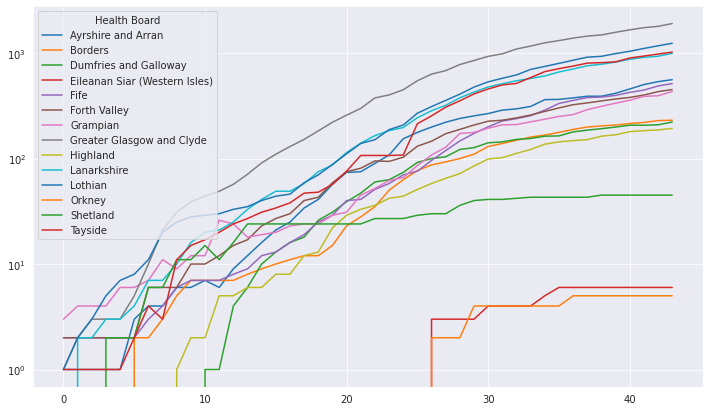

In [41]:
df_cases.drop(columns='Scotland (Total)').plot(logy=True, figsize=(12, 7))
plt.show()

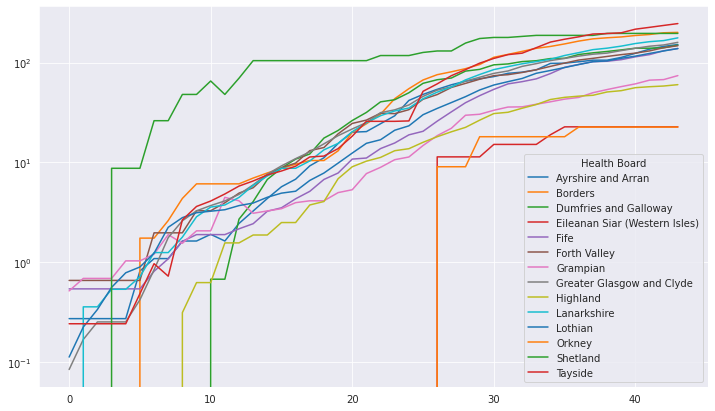

In [42]:
df_cases_rel.drop(columns='Scotland (Total)').plot(logy=True, figsize=(12, 7))
plt.show()